<a href="https://colab.research.google.com/github/pranay4712/datascience/blob/main/Multiple_Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
%matplotlib inline

In [ ]:
startups=pd.read_csv('50_Startups.csv')

In [ ]:
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


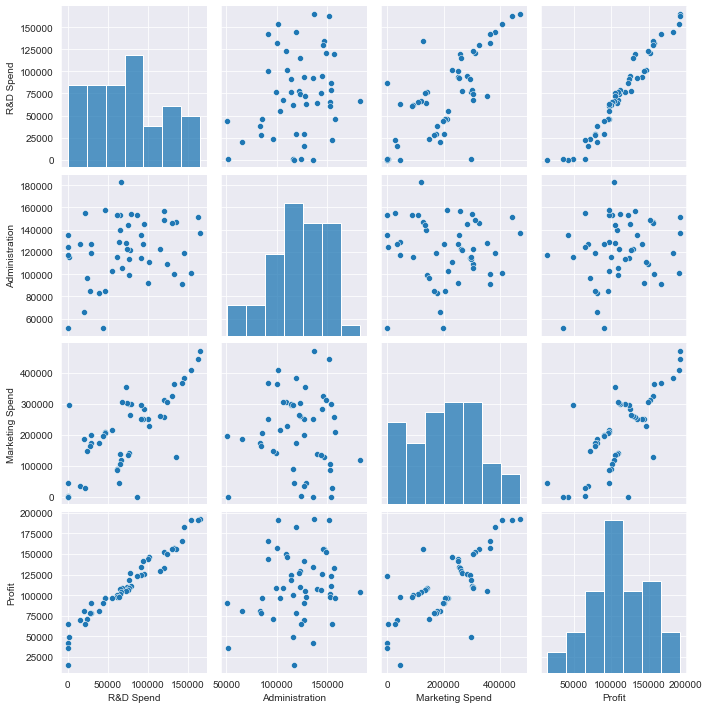

In [ ]:
#scatter plot help us to find the relaton between 2 variables and give idea about R^2.

sns.set_style(style='darkgrid')
sns.pairplot(startups)

In [ ]:
data1=startups.rename({'R&D Spend' : 'RD'},axis=1)
data1=data1.rename({'Marketing Spend':'MS'},axis=1)

In [ ]:
data1

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data1.describe()

,RD,Administration,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
data1.corr()

,RD,Administration,MS,Profit
RD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
#Preparing a model for getting  better prediction of profit 
import statsmodels.formula.api as smf

model=smf.ols('Profit~RD+Administration+MS+State',data=data1).fit()

In [ ]:
model.summary() # here we got R square is >0.85 hence the model have strong relation no need for modification.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           1.34e-27
Time:                        19:53:33   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State[T.Florida]    198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State[T.New York]   -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
RD                    0.8060      0.046     17.369      0.000       0.712       0.900
Administration       -0.0270      0.052     -0.517      0.608      -0.132       0.078
MS                    0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
(model.pvalues) # p values is greater than alpha so this data set is perfect.

Intercept            4.444178e-09
State[T.Florida]     9.532429e-01
State[T.New York]    9.897941e-01
RD                   2.578772e-21
Administration       6.077373e-01
MS                   1.226769e-01
dtype: float64

In [ ]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [ ]:
data2=smf.ols('Profit~RD',data=data1).fit()

In [ ]:
data2

In [ ]:
print(data2.tvalues, data2.pvalues)

Intercept    19.320288
RD           29.151139
dtype: float64 Intercept    2.782697e-24
RD           3.500322e-32
dtype: float64


In [ ]:
data2=smf.ols('Profit~MS',data=data1).fit()

In [ ]:
print(data2.tvalues,data2.pvalues)

Intercept    7.808356
MS           7.802657
dtype: float64 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [ ]:
data2=smf.ols('Profit~Administration',data=data2).fit()

In [ ]:
data2

In [ ]:
print(data2.tvalues,data2.pvalues)

ERROR! Session/line number was not unique in database. History logging moved to new session 23
Intercept    7.808356
MS           7.802657
dtype: float64 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [ ]:
rsqRD=smf.ols('RD ~ Administration+MS',data=data1).fit()
reqAdministration=smf.ols('Administration~RD+MS',data=data1).fit()
reqMS=smf.ols('MS~Administration+RD',data=data1).fit()

In [ ]:
R=(rsqRD.rsquared)
S=(reqAdministration.rsquared)
T=(reqMS.rsquared)

In [ ]:
model_RD=smf.ols('Profit~RD',data=data1).fit()
(model_RD.rsquared)

0.9465353160804392

In [ ]:
model_RD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           3.50e-32
Time:                        19:53:39   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_AD=smf.ols('Profit~Administration',data=data1).fit()

In [ ]:
model_AD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 15 Aug 2021   Prob (F-statistic):              0.162
Time:                        19:53:39   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model_MS=smf.ols('Profit~MS',data=data1).fit()

In [ ]:
model_MS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           4.38e-10
Time:                        19:53:40   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
S

0.14900208239517532

In [ ]:
T

0.5702202685282504

In [ ]:
vif_RD=1/(1-R)
vifAdmin=1/(1-S)
vifMS=1/(1-T)

In [ ]:
print(vif_RD,vifAdmin,vifMS)

2.468903069994701 1.1750910070550453 2.326773290530878


In [ ]:
# sorting VIF value in data frame

d1={'Variabels':['RD','Administration','MS'],'VIF':[vif_RD,vifAdmin,vifMS]}

In [ ]:
d1

{'Variabels': ['RD', 'Administration', 'MS'],
 'VIF': [2.468903069994701, 1.1750910070550453, 2.326773290530878]}

In [ ]:
VIF_Frame=pd.DataFrame(d1)
VIF_Frame

,Variabels,VIF
0,RD,2.468903
1,Administration,1.175091
2,MS,2.326773


In [ ]:
import statsmodels.api as sm

In [ ]:
#finding residuals
res=model.resid

In [ ]:
res

0      -128.741364
1      2720.739894
2      8774.203266
3      9317.013809
4     -6089.193818
5     -6482.687120
6     -1976.782788
7     -4403.044650
8       577.026673
9     -5069.702528
10    10457.307408
11     8730.799217
12    12302.602193
13     6876.101014
14   -17091.732777
15   -16226.595515
16    10138.855472
17    -4715.039933
18    -4882.825743
19     7182.671590
20     1903.295561
21    -5888.485088
22    -4481.055137
23    -1389.806104
24    -4742.333453
25     5204.071081
26    -5031.761170
27    -9271.494028
28     1463.792613
29     -716.402030
30      308.579462
31     -133.736321
32    -1560.396604
33    -1282.438947
34     7738.095839
35     6059.500395
36    15285.097137
37      371.437779
38    11622.538393
39    -2679.216039
40     3477.163825
41     2842.518952
42      922.496288
43     9658.711782
44      615.182788
45    17337.715291
46    -6782.242680
47    -3908.502004
48   -13449.663082
49   -33503.638791
dtype: float64

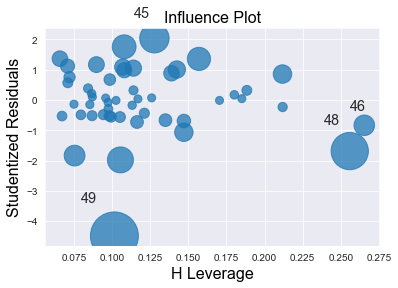

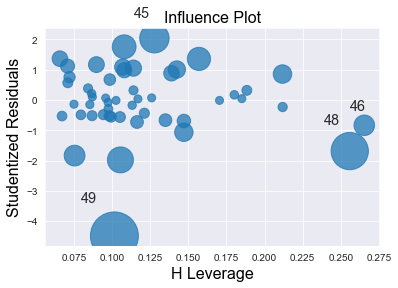

In [ ]:
sm.graphics.influence_plot(model)

In [ ]:
model.fittedvalues # y-Hat values

0     192390.571364
1     189071.320106
2     182276.186734
3     173584.976191
4     172277.133818
5     163473.807120
6     158099.292788
7     160155.644650
8     151634.743327
9     154829.662528
10    135664.642592
11    135528.600783
12    129282.917807
13    127431.248986
14    149694.382777
15    146143.635515
16    116854.074528
17    130085.409933
18    129149.725743
19    115594.188410
20    116570.734439
21    117201.505088
22    114833.305137
23    110123.796104
24    113294.373453
25    102200.268919
26    110765.301170
27    114279.804028
28    101818.587387
29    101721.042030
30     99629.010538
31     97617.296321
32     98988.236604
33     98061.358947
34     88974.704161
35     90420.009605
36     75423.092863
37     89577.702221
38     69606.521607
39     83684.976039
40     74762.746175
41     74956.311048
42     70575.993712
43     60100.268218
44     64585.147212
45     47588.364709
46     56272.992680
47     46468.232004
48     49123.073082
49     48185.038791


In [ ]:
# Residual plot of homoscedasticity
def standarized_value(val):
    return(val-val.mean())/val.std()


<function matplotlib.pyplot.show(close=None, block=None)>

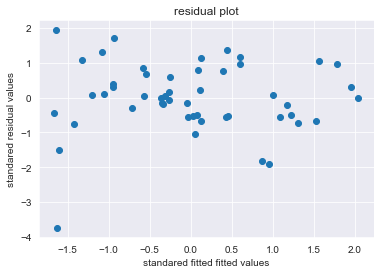

In [ ]:
plt.scatter(standarized_value(model.fittedvalues),
           standarized_value(model.resid))
plt.title('residual plot')
plt.xlabel('standared fitted fitted values')
plt.ylabel('standared residual values')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

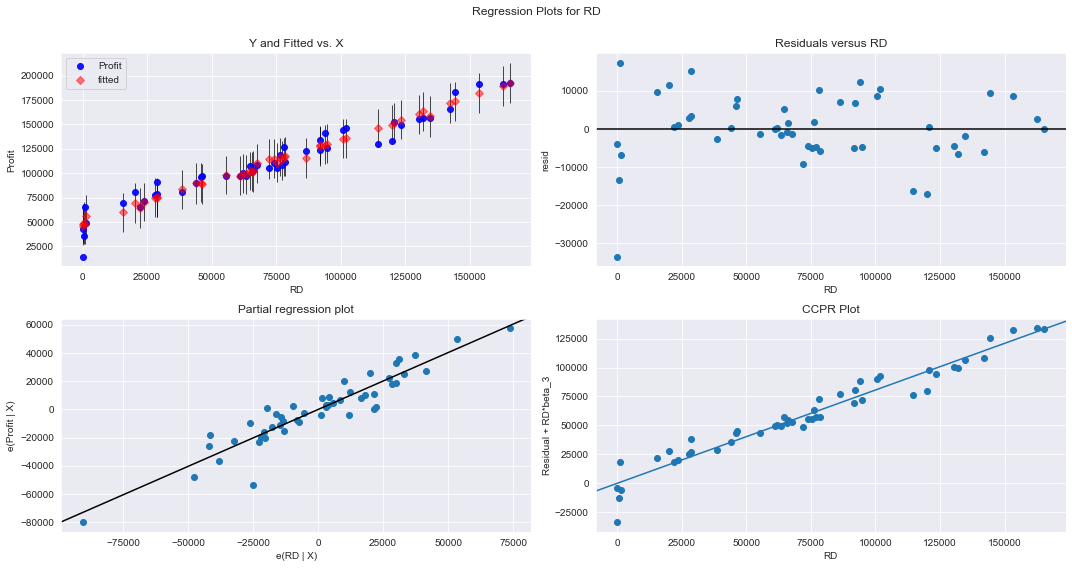

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"RD",fig=fig)
plt.show  # its partial regression plot and CCPR plot are in perfect slop

<function matplotlib.pyplot.show(close=None, block=None)>

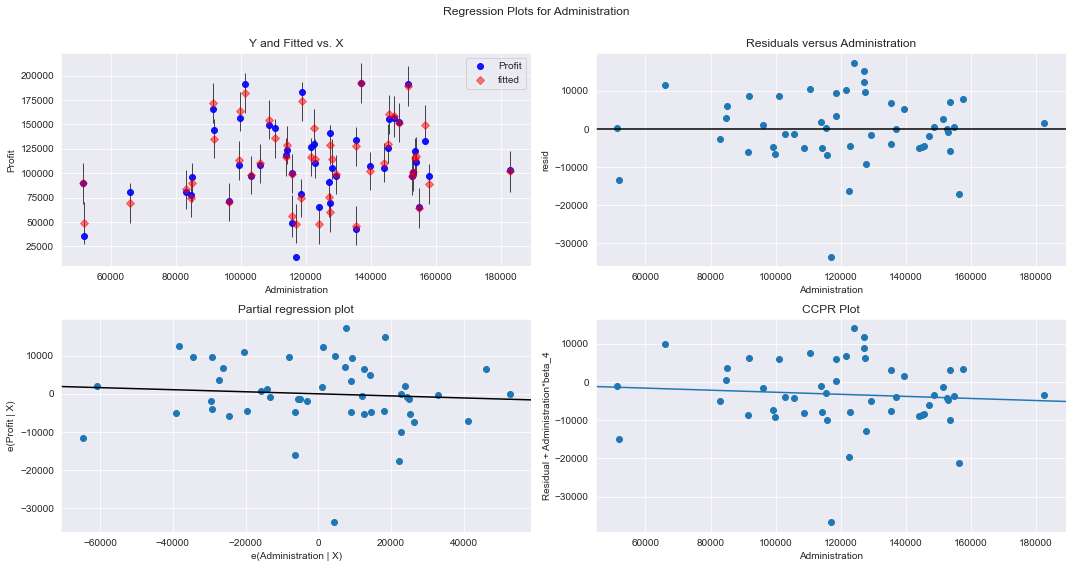

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show

In [ ]:
# there is problem in the shape

<function matplotlib.pyplot.show(close=None, block=None)>

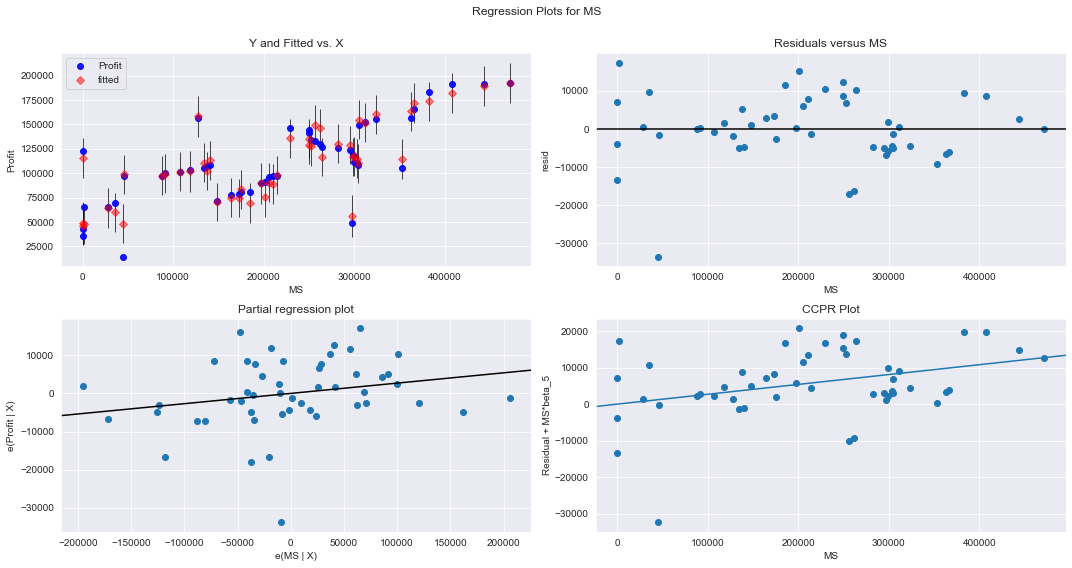

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"MS",fig=fig)
plt.show

In [ ]:
#from here we can conclude that data is fitted and it has Rsquared >0.85 hence fitted
# we can prepare final model
final_profit=smf.ols('Profit~RD+Administration+MS',data=data1).fit()

In [ ]:
#preparing dictionary for new data
new_data=pd.DataFrame({'RD':100000,'Administration':122699,'MS':21276.24},index=[1])

In [ ]:
new_data

,RD,Administration,MS
1,100000,122699,21276.24


In [ ]:
final_profit.predict(new_data)

1    127982.716317
dtype: float64

In [ ]:
final_profit.predict(data1)

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [ ]:
pred_y=final_profit.predict(data1)

In [ ]:
pred_y

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [ ]:

data1['rsquared']=(model.rsquared)

In [ ]:
data1

,RD,Administration,MS,State,Profit,rsquared
0,165349.20,136897.80,471784.10,New York,192261.83,0.950752
1,162597.70,151377.59,443898.53,California,191792.06,0.950752
2,153441.51,101145.55,407934.54,Florida,191050.39,0.950752
3,144372.41,118671.85,383199.62,New York,182901.99,0.950752
4,142107.34,91391.77,366168.42,Florida,166187.94,0.950752
5,131876.90,99814.71,362861.36,New York,156991.12,0.950752
6,134615.46,147198.87,127716.82,California,156122.51,0.950752
7,130298.13,145530.06,323876.68,Florida,155752.60,0.950752
8,120542.52,148718.95,311613.29,New York,152211.77,0.950752
9,123334.88,108679.17,304981.62,California,149759.96,0.950752


In [ ]:
#Q2
toyoto=pd.read_csv('toyotacorolla.csv')

In [ ]:
toyoto

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
toyoto.shape

(1436, 38)

In [ ]:
toyoto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
toyoto.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [ ]:
toyoto1=toyoto.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [ ]:
toyoto1=toyoto1.rename({'Age_08_04':'Age'},axis=1)

In [ ]:
toyoto1

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyoto.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


{'whiskers': [<matplotlib.lines.Line2D at 0x20457fe26a0>,
 'caps': [<matplotlib.lines.Line2D at 0x20457fe2d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x20457fe2340>],
 'medians': [<matplotlib.lines.Line2D at 0x20457feb460>],
 'fliers': [<matplotlib.lines.Line2D at 0x20457feb7c0>],
 'means': []}

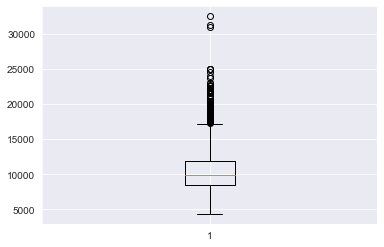

In [ ]:
#boxplot for eacg finfing outliers
plt.boxplot(toyoto1['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x204577bba00>,
 'caps': [<matplotlib.lines.Line2D at 0x2045781b100>,
 'boxes': [<matplotlib.lines.Line2D at 0x204577bb6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2045781b7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2045781bb20>],
 'means': []}

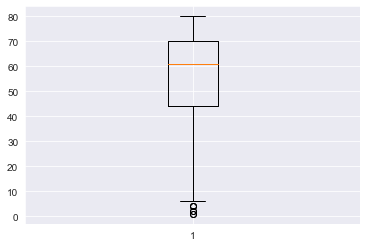

In [ ]:
plt.boxplot(toyoto1['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x204579eb1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x204579eb880>,
 'boxes': [<matplotlib.lines.Line2D at 0x204579cee20>],
 'medians': [<matplotlib.lines.Line2D at 0x204579ebf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x20457b042e0>],
 'means': []}

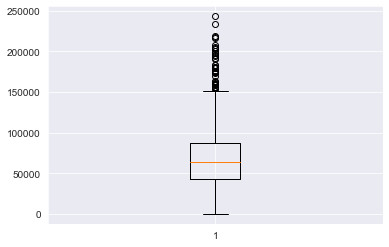

In [ ]:
plt.boxplot(toyoto1['KM'])

{'whiskers': [<matplotlib.lines.Line2D at 0x204578acd90>,
 'caps': [<matplotlib.lines.Line2D at 0x2045794d490>,
 'boxes': [<matplotlib.lines.Line2D at 0x204578aca30>],
 'medians': [<matplotlib.lines.Line2D at 0x2045794db50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2045794deb0>],
 'means': []}

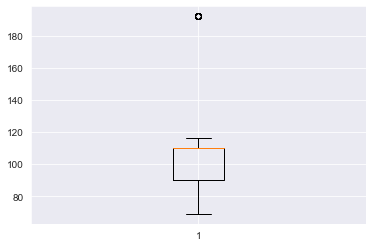

In [ ]:
plt.boxplot(toyoto1['HP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2045785e310>,
 'caps': [<matplotlib.lines.Line2D at 0x204578773a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20457871e20>],
 'medians': [<matplotlib.lines.Line2D at 0x2045797f9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x204579a30a0>],
 'means': []}

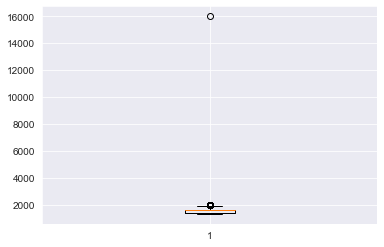

In [ ]:
plt.boxplot(toyoto1['cc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x204575f8220>,
 'caps': [<matplotlib.lines.Line2D at 0x2045655fb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x204575f83a0>],
 'medians': [<matplotlib.lines.Line2D at 0x20457a99a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x20457a83970>],
 'means': []}

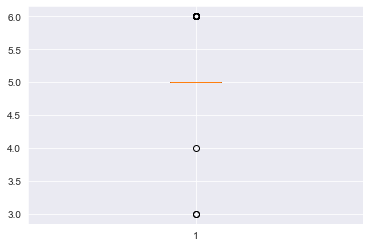

In [ ]:
plt.boxplot(toyoto1['Gears'])

(array([110., 706., 343., 114.,  75.,  59.,  22.,   4.,   0.,   3.]),
 array([ 4350.,  7165.,  9980., 12795., 15610., 18425., 21240., 24055.,
        26870., 29685., 32500.]),
 <BarContainer object of 10 artists>)

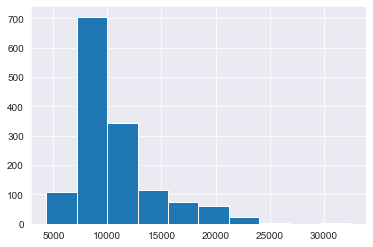

In [ ]:
# we can check from the above plottations that each variables have outliers in it


# We go for histogram saperately
plt.hist(toyoto1['Price'])

(array([ 24.,  36.,  62.,  64., 108., 127., 182., 247., 287., 299.]),
 array([ 1. ,  8.9, 16.8, 24.7, 32.6, 40.5, 48.4, 56.3, 64.2, 72.1, 80. ]),
 <BarContainer object of 10 artists>)

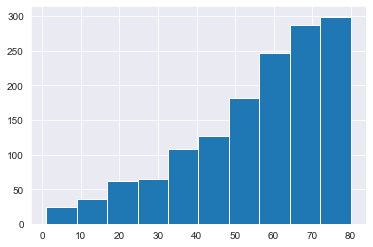

In [ ]:
plt.hist(toyoto1['Age'])

(array([109., 285., 166., 865.,   0.,   0.,   0.,   0.,   0.,  11.]),
 array([ 69. ,  81.3,  93.6, 105.9, 118.2, 130.5, 142.8, 155.1, 167.4,
        179.7, 192. ]),
 <BarContainer object of 10 artists>)

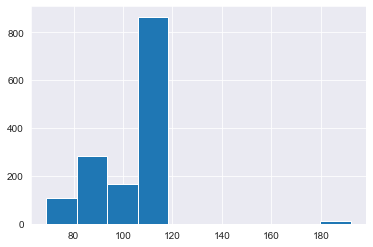

In [ ]:
plt.hist(toyoto1['HP'])

(array([1.435e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1300.,  2770.,  4240.,  5710.,  7180.,  8650., 10120., 11590.,
        13060., 14530., 16000.]),
 <BarContainer object of 10 artists>)

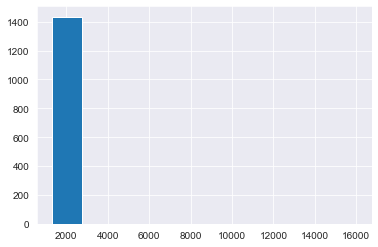

In [ ]:
plt.hist(toyoto1['cc'])

(array([ 73., 577., 616.,  19.,   0.,   1., 110.,  18.,  19.,   3.]),
 array([ 19. ,  45.4,  71.8,  98.2, 124.6, 151. , 177.4, 203.8, 230.2,
        256.6, 283. ]),
 <BarContainer object of 10 artists>)

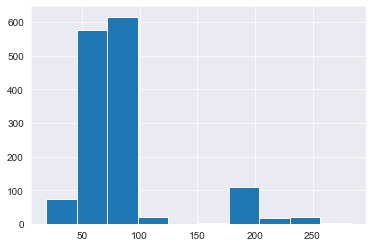

In [ ]:
plt.hist(toyoto1['Quarterly_Tax'])

In [ ]:
#here we conclude that the values are not normally distributed


#QQ plot
import statsmodels.api as sm


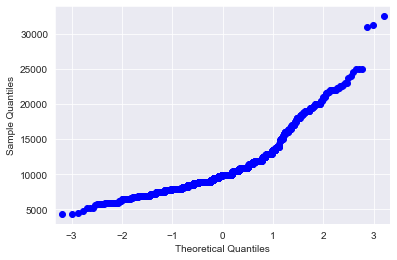

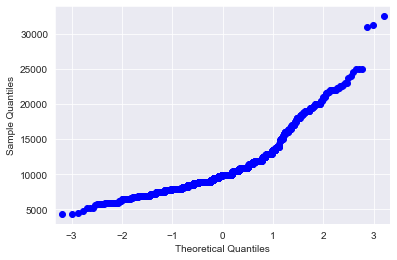

In [ ]:
sm.graphics.qqplot(toyoto1['Price'])

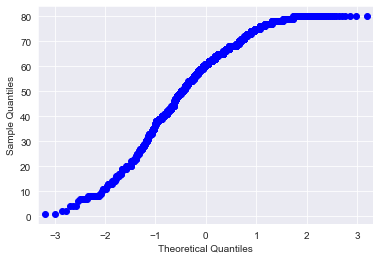

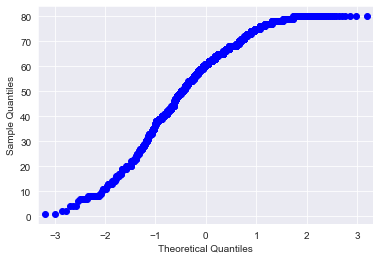

In [ ]:
sm.graphics.qqplot(toyoto1['Age'])

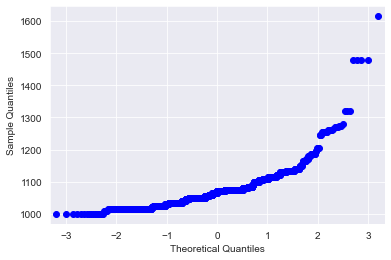

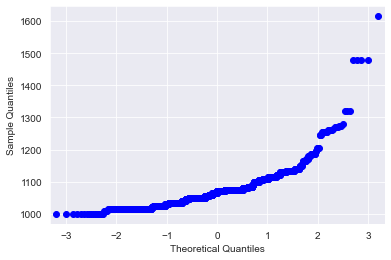

In [ ]:
sm.graphics.qqplot(toyoto1['Weight'])


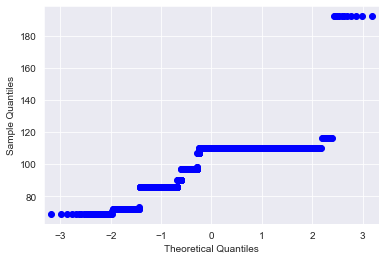

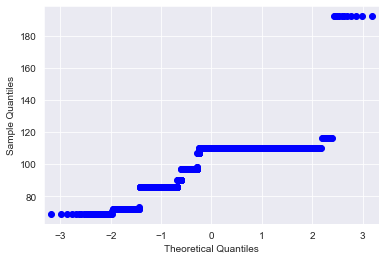

In [ ]:
sm.graphics.qqplot(toyoto1['HP'])

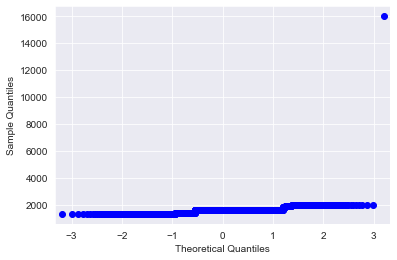

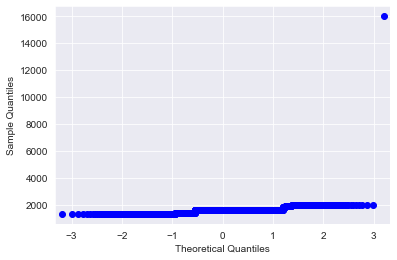

In [ ]:
sm.graphics.qqplot(toyoto1['cc'])

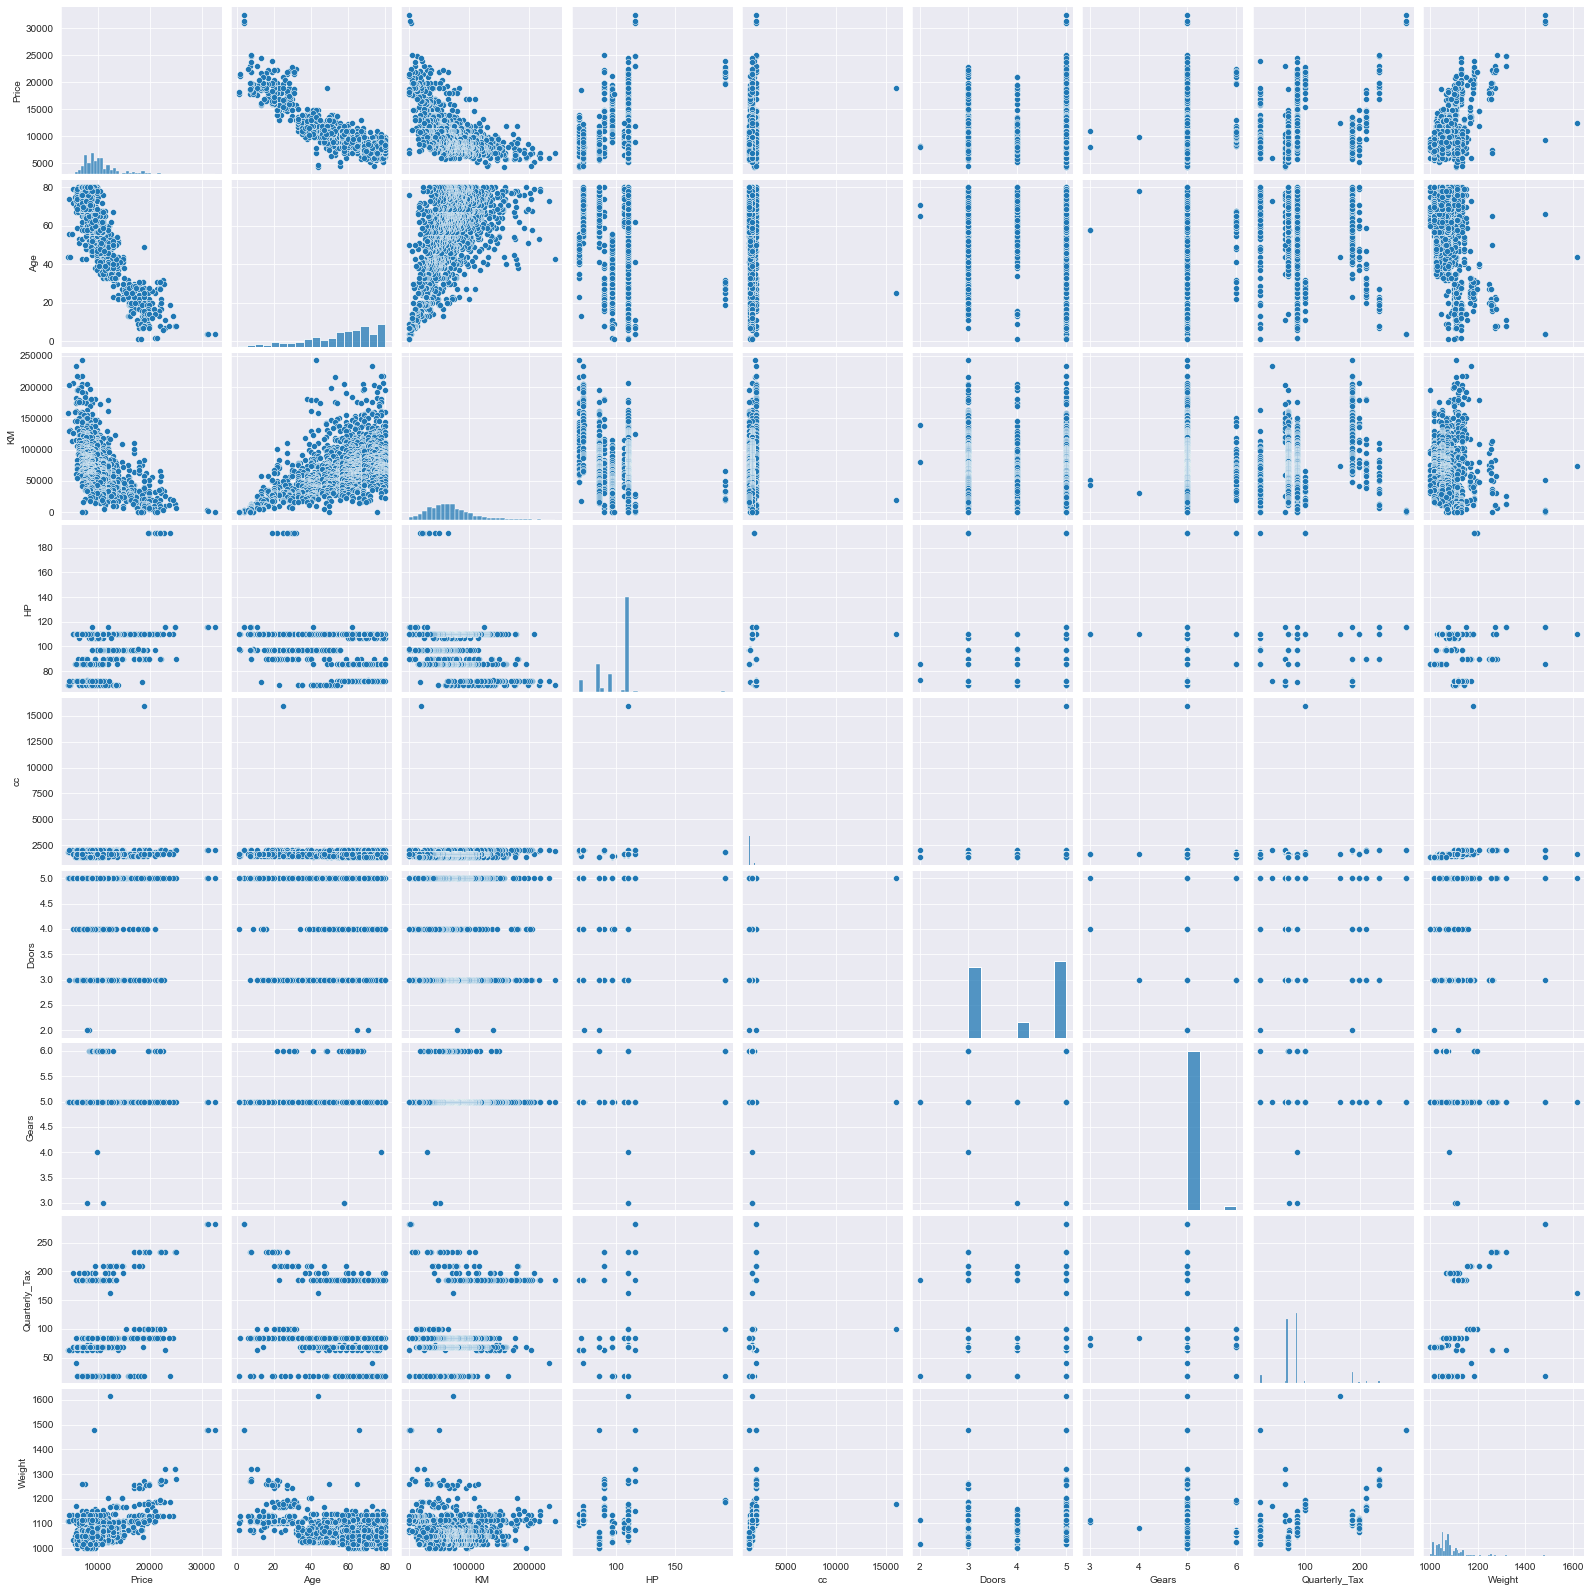

In [ ]:
#so we can conclude from these graphs tha the values are not normal and all are descrete count values.


# now we go for Pair plot representation for finding relations between


sns.pairplot(toyoto1)

In [ ]:
toyoto1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [ ]:
# we are going to prepare a model and find the value of r^2

import statsmodels.formula.api as smf
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyoto1).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 15 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:04:25   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model.params

Intercept       -5573.106358
Age              -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [ ]:
model.pvalues

Intercept         8.241949e-05
Age              3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

In [ ]:
model.tvalues

Intercept        -3.948666
Age             -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64

In [ ]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [ ]:
#while Rsquared> 0.85 but still there is collinearity due to AIC values is very large



#simple linear regression

model1_cc=smf.ols('Price~cc',data=toyoto1).fit()
print(model1_cc.tvalues, '\n', model1_cc.pvalues,'\n',model1_cc.rsquared,model1_cc.rsquared_adj)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64 
 0.015974229213323032 0.01528801877344399


In [ ]:
model1_G=smf.ols('Price~Gears',data=toyoto1).fit()

print(model1_G.tvalues,'\n',model1_G.pvalues,'\n',model1_G.rsquared,model1_G.rsquared_adj)

Intercept    1.814534
Gears        2.394401
dtype: float64 
 Intercept    0.069804
Gears        0.016775
dtype: float64 
 0.003982096785360767 0.003287523631096856


In [ ]:
model1_D=smf.ols('Price~Doors',data=toyoto1).fit()

print(model1_D.tvalues,'\n',model1_D.pvalues,'\n',model1_D.rsquared,model1_D.rsquared_adj)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64 
 0.03434555943109785 0.03367216023962727


In [ ]:
model1_G_cc=smf.ols('Price~Gears+cc',data=toyoto1).fit()

print(model1_G_cc.tvalues,'\n',model1_G_cc.pvalues,'\n',model1_G_cc.rsquared,model1_G_cc.rsquared_adj)

Intercept    1.220967
Gears        2.342269
cc           4.797580
dtype: float64 
 Intercept    0.222299
Gears        0.019303
cc           0.000002
dtype: float64 
 0.019727190908794268 0.018359050212226058


In [ ]:
model1_G_cc_D=smf.ols('Price~Gears+Doors+cc',data=toyoto1).fit()
print(model1_G_cc_D.tvalues,'\n',model1_G_cc_D.pvalues,'\n',model1_G_cc_D.rsquared,model1_G_cc_D.rsquared_adj)

Intercept   -0.989599
Gears        3.539175
Doors        7.326084
cc           4.257480
dtype: float64 
 Intercept    3.225376e-01
Gears        4.142173e-04
Doors        3.942093e-13
cc           2.201990e-05
dtype: float64 
 0.05514061705170514 0.053161163037148684


In [ ]:
# Calculation of VIF values


model1_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           1.55e-06
Time:                        20:09:36   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
m1_A=smf.ols('Age~KM+HP+cc+Gears+Quarterly_Tax+Weight+Doors',data=toyoto1).fit()

In [ ]:
vif_A=1/(1-(m1_A.rsquared))

In [ ]:
vif_A

1.8846198056602876

In [ ]:
m1_K=smf.ols('KM~Age+HP+cc+Gears+Quarterly_Tax+Weight+Doors',data=toyoto1).fit()

In [ ]:
vif_K=1/(1-(m1_K.rsquared))

In [ ]:
vif_K

1.7569047782042877

In [ ]:
m1_H=smf.ols('HP~KM+Age+cc+Gears+Quarterly_Tax+Weight+Doors',data=toyoto1).fit()

In [ ]:
vif_H=1/(1-(m1_H.rsquared))

In [ ]:
vif_H

1.4194221086310974

In [ ]:
m1_cc=smf.ols('cc~KM+HP+cc+Gears+Quarterly_Tax+Weight+Doors',data=toyoto1).fit()

In [ ]:
vif_cc=1/(1-(m1_cc.rsquared))

<ipython-input-115-19b909c5df26>:1: RuntimeWarning: divide by zero encountered in double_scalars
  vif_cc=1/(1-(m1_cc.rsquared))


In [ ]:
vif_cc

inf

In [ ]:
m1_G=smf.ols('Gears~KM+HP+cc+Age+Quarterly_Tax+Weight+Doors',data=toyoto1).fit()

In [ ]:
vif_G=1/(1-(m1_G.rsquared))

In [ ]:
vif_G

1.0987230193470365

In [ ]:
m1_Q=smf.ols('Quarterly_Tax~KM+HP+cc+Gears+Age+Weight+Doors',data=toyoto1).fit()

In [ ]:
vif_Q=1/(1-(m1_Q.rsquared))

In [ ]:
vif_Q

2.311430811531037

In [ ]:
m1_W=smf.ols('Weight~KM+HP+cc+Gears+Age+Quarterly_Tax+Doors',data=toyoto1).fit()

In [ ]:
vif_W=1/(1-(m1_Q.rsquared))

In [ ]:
vif_W

2.311430811531037

In [ ]:
m1_D=smf.ols('Doors~KM+HP+cc+Gears+Age+Quarterly_Tax+Weight',data=toyoto1).fit()

In [ ]:
vif_D=1/(1-(m1_D.rsquared))

In [ ]:
vif_D

1.1565752070760436

In [ ]:
d1={'variables':['Age','KM','HP','cc','Gears','Quarterly_Tax','Weight','Doors'],'VIF':[vif_A,vif_K,vif_H,vif_cc,vif_G,vif_Q,vif_W,vif_D]}

In [ ]:
vf=pd.DataFrame(d1)

In [ ]:
vf

,variables,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,inf
4,Gears,1.098723
5,Quarterly_Tax,2.311431
6,Weight,2.311431
7,Doors,1.156575


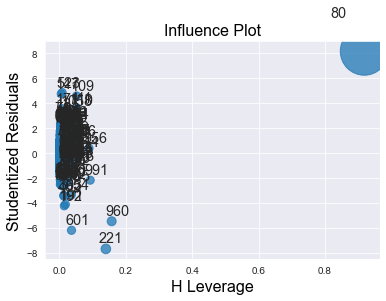

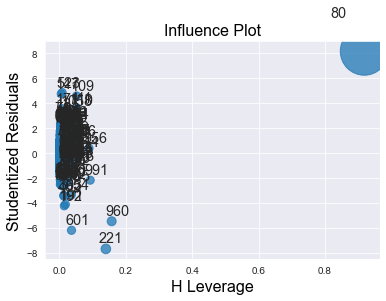

In [ ]:
#plotting influence plot
import statsmodels.api as sm

sm.graphics.influence_plot(model)

In [ ]:
res=model.resid

In [ ]:
res

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

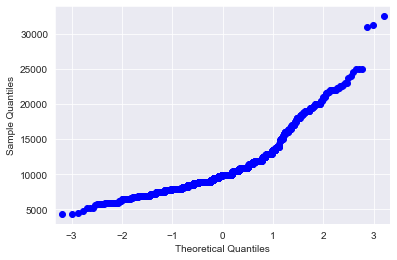

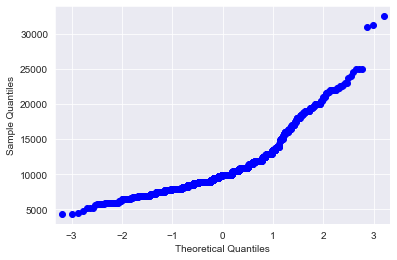

In [ ]:
import statsmodels.api as sm
sm.graphics.qqplot(toyoto1['Price'])

In [ ]:
list(np.where(model.resid>2500))

[array([  14,   16,   49,   52,   62,   66,   72,   74,   76,   80,   91,
         109,  110,  111,  115,  125,  139,  141,  146,  147,  149,  154,
         161,  171,  174,  178,  179,  523,  557,  656,  696,  796,  913,
        1054, 1058, 1059, 1079, 1131, 1250, 1378, 1402, 1432], dtype=int64)]

In [ ]:
model.fittedvalues

0       16812.580505
1       16272.355186
2       16800.732460
3       16426.496731
4       16222.419010
            ...     
1431     8793.758297
1432     8291.338421
1433     8454.298007
1434     8578.038121
1435    10402.438333
Length: 1436, dtype: float64

In [ ]:
# Residual plot for homoscedasticity

def get_std_val(vals):
    return(vals-vals.mean())/vals.std()

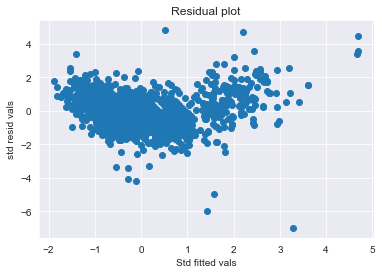

In [ ]:
plt.scatter(get_std_val(model.fittedvalues),
               get_std_val(model.resid))
plt.title('Residual plot')
plt.xlabel('Std fitted vals')
plt.ylabel('std resid vals')
plt.show()

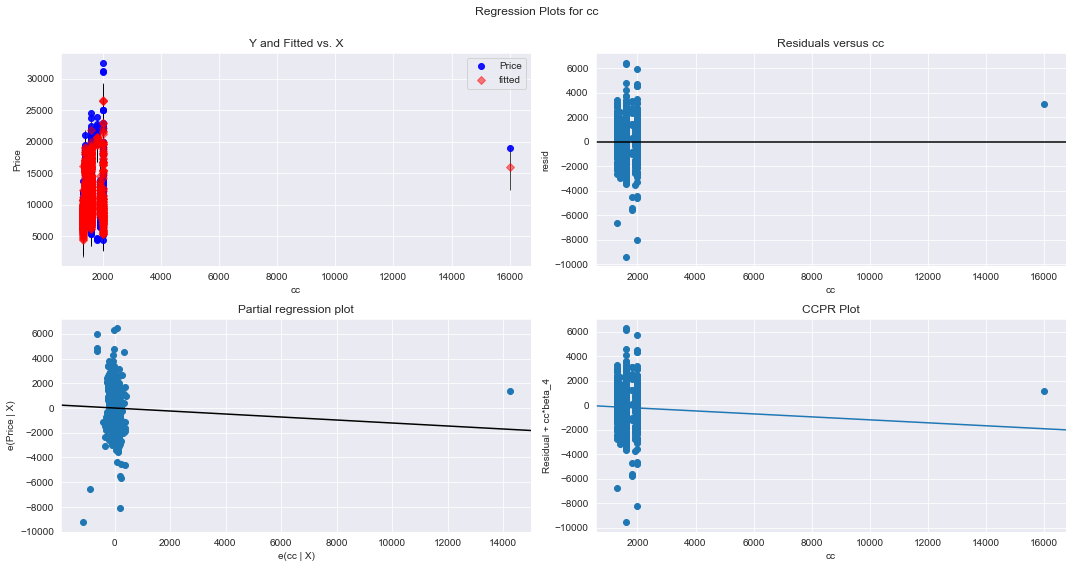

In [ ]:
# Residual vs regressor plot
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"cc", fig=fig)
plt.show()

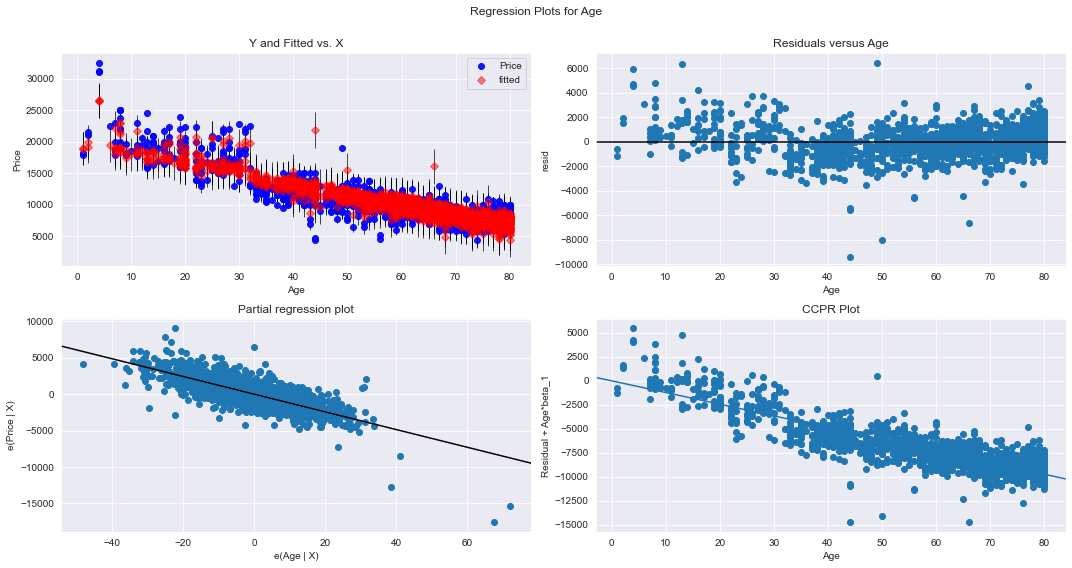

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

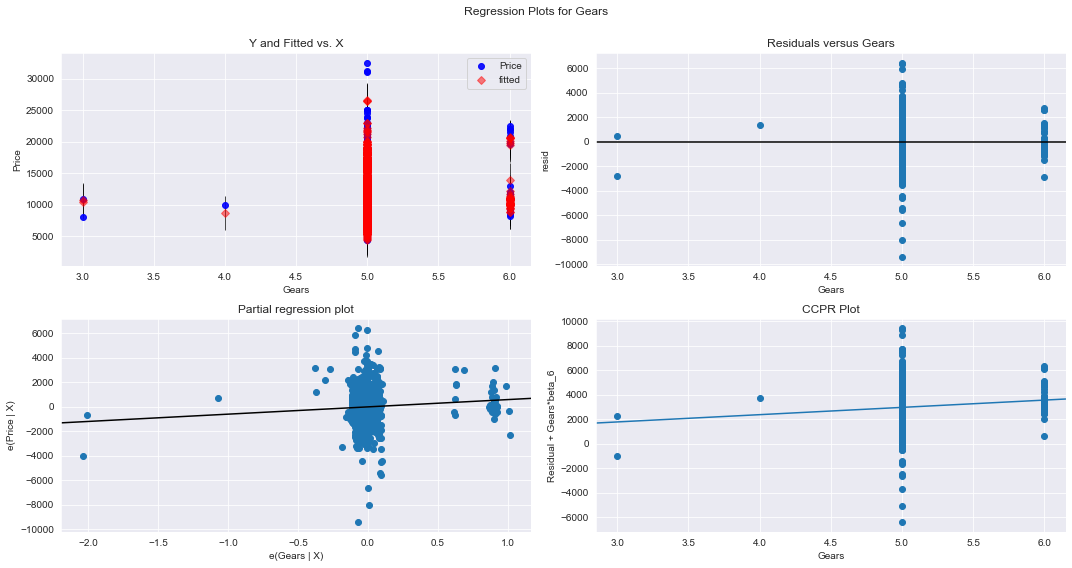

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()

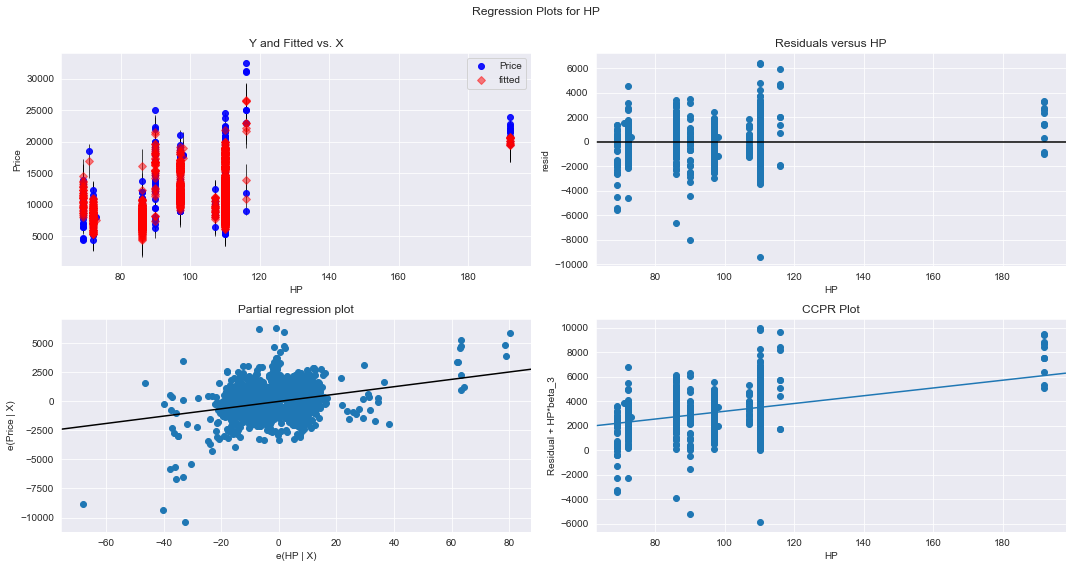

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()

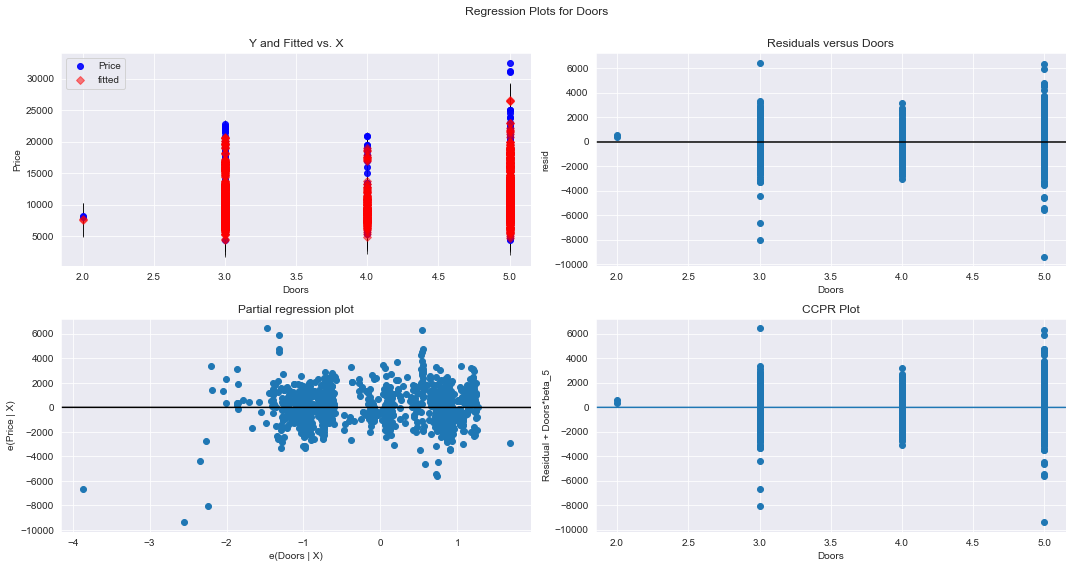

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()

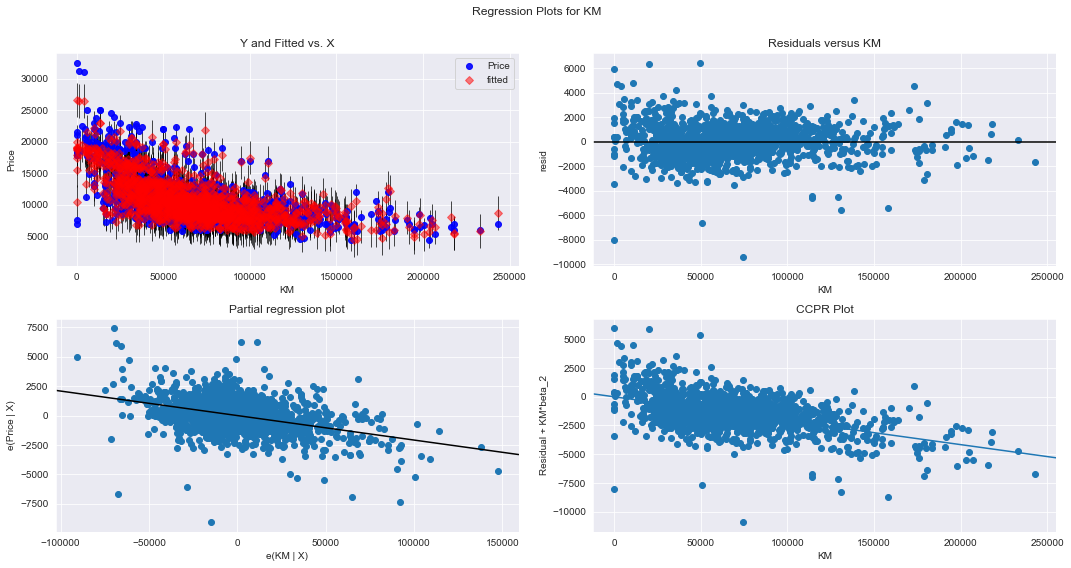

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

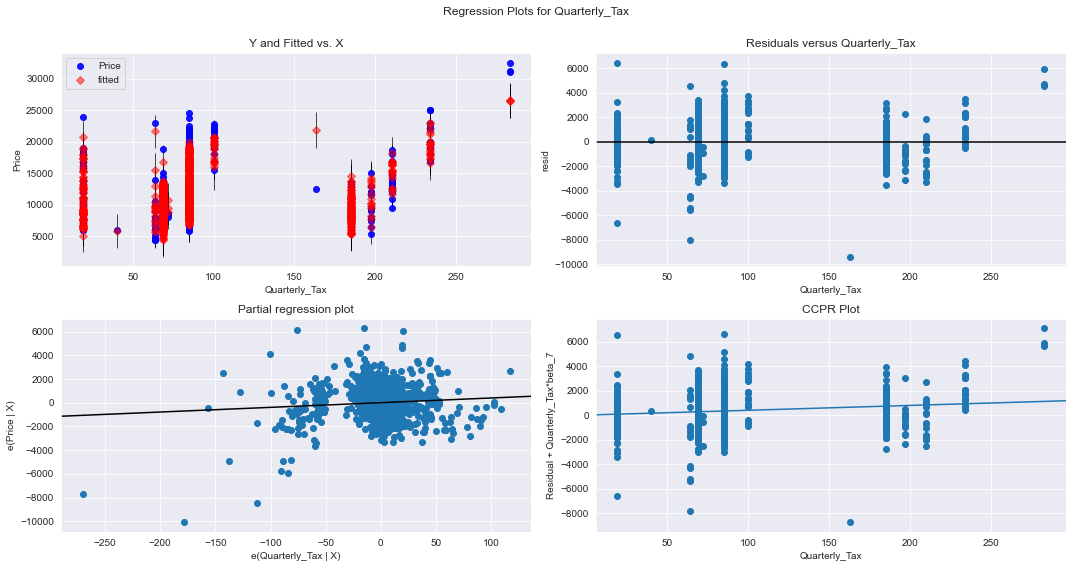

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Quarterly_Tax",fig=fig)
plt.show()

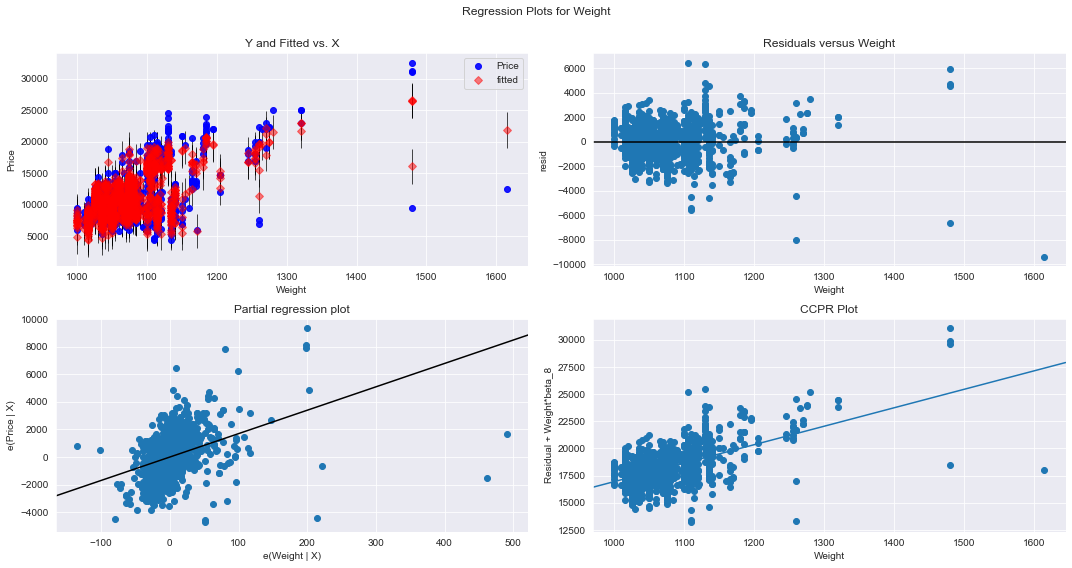

In [ ]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()

In [ ]:
#we conclude from th graph is that the DOORS GEARS & cc are the most multicollinearities.




# lets go for the cooks distance


from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance#we only intrested in coks distance so we dont put summary we use function cooks_distance

In [ ]:
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

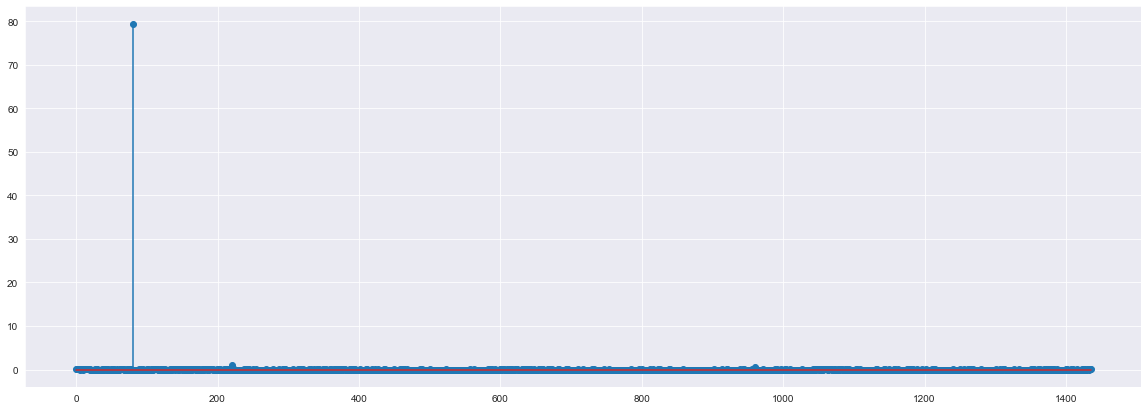

In [ ]:
# plot influencer values

fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyoto1)),np.round(c,3))
plt.show()

In [ ]:
(np.argmax(c)),np.max(c)

(80, 79.52010624139552)

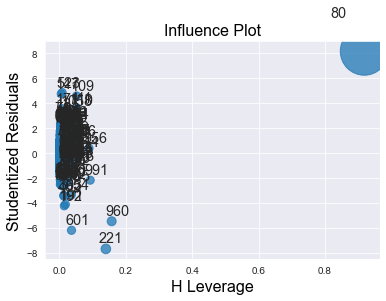

In [ ]:
influence_plot(model)
plt.show()

In [ ]:
# finding leverage cutoff

k=toyoto1.shape[1]
n=toyoto1.shape[0]
L_cutoff=3*((k+1)/n)

In [ ]:
L_cutoff

0.020891364902506964

In [ ]:
toyoto1[toyoto1.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [ ]:
toyoto1.head()# see diffrence in other varible values

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
toyoto1_new=toyoto1

In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyoto2=toyoto1_new.drop(toyoto1_new.index[[80]],axis=0).reset_index()

In [ ]:
toyoto2

,index,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyoto2=toyoto2.drop(['index'],axis=1)

In [ ]:
toyoto2

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


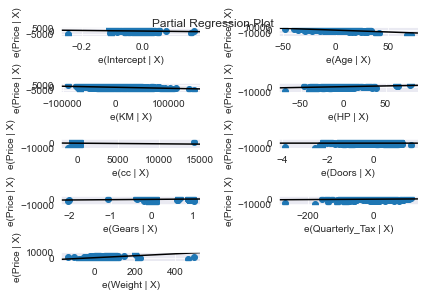

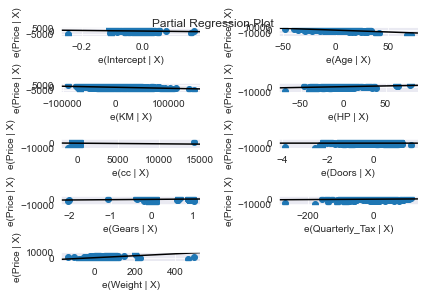

In [ ]:
sm.graphics.plot_partregress_grid(model)